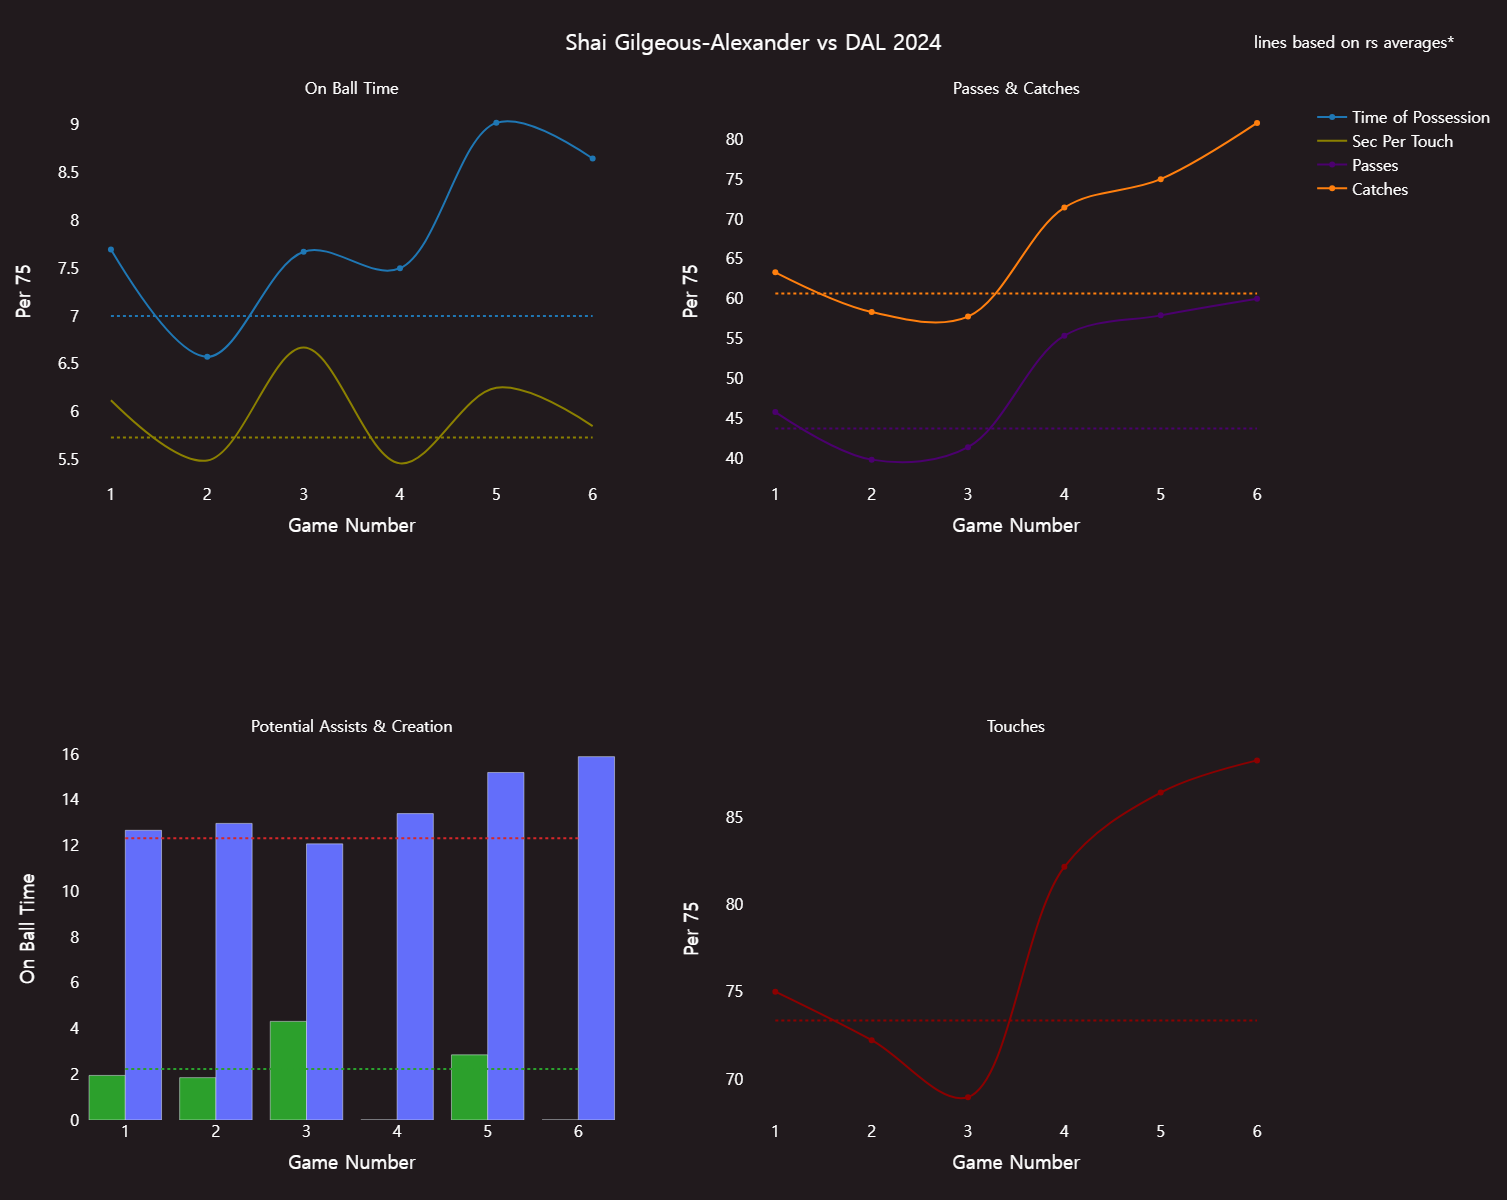

In [20]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def convert_to_full_team_names(team_string):
    # Dictionary mapping abbreviations to full NBA team names
    team_map = {
        'ATL': 'Atlanta Hawks',
        'BOS': 'Boston Celtics',
        'BKN': 'Brooklyn Nets',
        'CHA': 'Charlotte Hornets',
        'CHI': 'Chicago Bulls',
        'CLE': 'Cleveland Cavaliers',
        'DAL': 'Dallas Mavericks',
        'DEN': 'Denver Nuggets',
        'DET': 'Detroit Pistons',
        'GSW': 'Golden State Warriors',
        'HOU': 'Houston Rockets',
        'IND': 'Indiana Pacers',
        'LAC': 'Los Angeles Clippers',
        'LAL': 'Los Angeles Lakers',
        'MEM': 'Memphis Grizzlies',
        'MIA': 'Miami Heat',
        'MIL': 'Milwaukee Bucks',
        'MIN': 'Minnesota Timberwolves',
        'NOP': 'New Orleans Pelicans',
        'NYK': 'New York Knicks',
        'OKC': 'Oklahoma City Thunder',
        'ORL': 'Orlando Magic',
        'PHI': 'Philadelphia 76ers',
        'PHX': 'Phoenix Suns',
        'POR': 'Portland Trail Blazers',
        'SAC': 'Sacramento Kings',
        'SAS': 'San Antonio Spurs',
        'TOR': 'Toronto Raptors',
        'UTA': 'Utah Jazz',
        'WAS': 'Washington Wizards'
    }


    # Split the input string into parts (team abbreviations and year)
    parts = team_string.split('_')

    # Extract team abbreviations (OKC, DAL) and ignore the year (2024)
    teams = parts[:-1]
    
    # Get the full team names using the dictionary
    full_team_names = [team_map.get(team, team) for team in teams]

    # Underline the first team name and join the rest with <br>
    full_team_names[0] = f"<span style='text-decoration:underline;'>{full_team_names[0]}</span>"

    full_team_names[0]= parts[-1]+' '+ full_team_names[0]


    full_team_names[1]= 'vs ' +full_team_names[1]
    
    
    # Join the full names with <br> and return
    return '<br>'.join(full_team_names)


def format_data_pass(series_data):
    series_data['rimfga']=series_data['RA_FGA']
    series_data['TSA']=series_data['FGA']+(series_data['FTA']*.44)
    series_data['ft_freq']=100* series_data['FTA']/series_data['TSA']
    series_data['rim_freq']=100* series_data['FGA_LT_5']/series_data['TSA']
    series_data['pullup_freq']=100* series_data['PULL_UP_FGA']/series_data['TSA']
    
    series_data['ft_rate']=75* series_data['FTA']/series_data['POSS']
    series_data['rim_rate']=75* series_data['FGA_LT_5']/series_data['POSS']
    series_data['pullup_rate']=75* series_data['PULL_UP_FGA']/series_data['POSS']   
    #series_data['open_FG3_freq']=100* series_data['open_FG3A']/series_data['TSA']
    #series_data['tight_FG3_freq']=100* (series_data['tight_FG3A']+series_data['very_tight_FG3A'])/series_data['TSA']
    #series_data['wide_open_FG3_freq']=100* series_data['wide_open_FG3A']/series_data['TSA']

    series_data['on_ball_time']=75*series_data['TIME_OF_POSS']/series_data['POSS']
    
    series_data['catch_rate']=75*series_data['PASSES_RECEIVED']/series_data['POSS']
    series_data['pass_rate']=75*series_data['PASSES_MADE']/series_data['POSS']
    series_data['touch_rate']=75*series_data['TOUCHES']/series_data['POSS']   
    series_data['PULL_UP_EFG'] =100* (series_data['PULL_UP_FGM'] + 0.5 * series_data['PULL_UP_FG3M']) / series_data['PULL_UP_FGA']
    series_data['TS_PCT']*=100
    series_data['TOV_freq']=75* series_data['TOV']/series_data['POSS']
    series_data['score_rate']=75* series_data['PTS']/series_data['POSS']
    series_data['pot_ast_rate']= 75* series_data['POTENTIAL_AST']/series_data['POSS']
    
    series_data['open_FG3%']=100* series_data['open_FG3M']/series_data['open_FG3A']
    series_data['tight_FG3%']=100* series_data['tight_FG3M']/series_data['tight_FG3A']
    series_data['wide_open_FG3%']=100* series_data['wide_open_FG3M']/series_data['wide_open_FG3A']
    return series_data
def player_series_pass(player_id,team,opp,year):
    file_name=team.upper()+'_'+opp.upper()+'_'+str(year)
    url_base='https://raw.githubusercontent.com/gabriel1200/shot_data/refs/heads/master/series/'
  

    df =pd.read_csv(url_base+file_name+'.csv')

    avg=pd.read_csv(str(year)+'_avg.csv')


    
    series_data=df[df['PLAYER_ID']==player_id].reset_index(drop=True)

    avg_data= avg[avg['PLAYER_ID']==player_id].reset_index(drop=True)
    name = series_data['PLAYER_NAME'].iloc[0]
    
    series_data['game_number']=[i for i in range(1, len(series_data)+1)]
    series_data=format_data_pass(series_data)
    avg_data=format_data_pass(avg_data)
    

    
    fig = make_subplots(rows=2, cols=2, subplot_titles=(
            "On Ball Time",
    
        "Passes & Catches",
         "Potential Assists & Creation",

       
            "Touches",
 
    ))
    
        # 1. Line Chart for Wide Open Three Point Shots (Time of Possession)
    # 1. Line Chart for Wide Open Three Point Shots (Time of Possession)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['on_ball_time'], 
                   mode='lines+markers', name='Time of Possession', line=dict(shape='spline', width=2, color='#1f77b4')),
        row=1, col=1
    )
    # Horizontal line for the average of Time of Possession (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['on_ball_time'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#1f77b4')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['AVG_SEC_PER_TOUCH'],
                   mode='lines', name='Sec Per Touch', line=dict(shape='spline', width=2, color='#8B8000')),
        row=1, col=1
    )
    # Horizontal line for the average of Free Throws (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['AVG_SEC_PER_TOUCH'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#8B8000')),
        row=1, col=1
    )
    # 2. Points (Score Rate)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['pass_rate'], 
                   mode='lines+markers', name='Passes', line=dict(shape='spline', width=2, color='#4B006E')),
        row=1, col=2
    )
    # Horizontal line for the average of Points (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['pass_rate'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#4B006E')),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['catch_rate'],
                   mode='lines+markers', name='Catches', line=dict(shape='spline', width=2, color='#ff7f0e')),
        row=1, col=2
    )
    # Horizontal line for the average of Points (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['catch_rate'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#ff7f0e')),
        row=1, col=2
    )
    
    # 3. Turnovers (TOV_freq)
    fig.add_trace(
        go.Bar(x=series_data['game_number'], y=series_data['TOV_freq'], name='Turnovers',marker_color='#2ca02c', showlegend=False),
        row=2, col=1
    )
    # Horizontal line for the average of Turnovers (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['TOV_freq'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#2ca02c')),
        row=2, col=1
    )
    
    # 4. Potential Assists (pot_ast_rate)
    fig.add_trace(
        go.Bar(x=series_data['game_number'], y=series_data['pot_ast_rate'], name='Potential Assists', showlegend=False),
        row=2,col=1,
    )
    # Horizontal line for the average of Potential Assists (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['pot_ast_rate'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#d62728')),
        row=2,col=1,
    )

    # 5. Pullups (pullup_rate)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['touch_rate'],showlegend=False,
                   mode='lines+markers', name='Touches', line=dict(shape='spline', width=2, color='#8B0000')),
        row=2, col=2
    )
    # Horizontal line for the average of Pullups (same color, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['touch_rate'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#8B0000')),
        row=2, col=2
    )
    
    # 6. Rim Attempts (rim_rate)


    
    # Update layout
    fig.update_layout(height=1200, width=1200, title_text=name+ ' vs '+opp.upper() + ' '+str(year),title_x=.5,title_font_size=22,
                      paper_bgcolor='#211a1d',plot_bgcolor='#211a1d', font=dict(
                family="Malgun Gothic",
                          size=16,
                color="#ffffff"
                ))
    tickvals=[i for i in range(1,series_data['game_number'].max()+1)]
    fig.update_yaxes(title_text="On Ball Time",row=2,col=1,showgrid=False)
    fig.update_yaxes(title_text="Per 75",row=1,col=1,showgrid=False)
    
    fig.update_yaxes(title_text="TS%",row=3,col=2,showgrid=False)
    
    fig.update_yaxes(title_text="Per 75",row=3,col=1,showgrid=False)
    
    fig.update_yaxes(title_text="Per 75",row=1,col=2,showgrid=False)
    
    fig.update_annotations(font_size=16)
    fig.update_yaxes(title_text="Per 75",row=2,col=2,showgrid=False)
    fig.update_xaxes(title_text="Game Number",showgrid=False,tickvals=tickvals,showline=False,zeroline=False)
    fig.update_yaxes(zeroline=False)
    fig.add_annotation(text="lines based on rs averages*",
                       
                      xref="paper", yref="paper",
                      x=1.14, y=1.07, showarrow=False)
    # Show the plot
    return fig
fig=player_series_pass(1628983,'okc','dal',2024)

fig.show()